2.19.0
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (25000, 300), Test shape: (25000, 300)


Model: "SimpleRNN_IMDB"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_ids (InputLayer)          │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 300, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn (SimpleRNN)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ logits (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,593,025 (9.89 MB)

 Trainable params: 2,593,025 (9.89 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 45s 277ms/step - accuracy: 0.5432 - loss: 0.6820 - val_accuracy: 0.6608 - val_loss: 0.6067
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 39s 248ms/step - accuracy: 0.7382 - loss: 0.5224 - val_accuracy: 0.6190 - val_loss: 0.6441
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 43s 259ms/step - accuracy: 0.7022 - loss: 0.5927 - val_accuracy: 0.6426 - val_loss: 0.6230

Test Loss: 0.6054 | Test Accuracy: 0.6548

Classification Report (test):
              precision    recall  f1-score   support

         neg     0.8182    0.3981    0.5356     12500
         pos     0.6023    0.9115    0.7253     12500

    accuracy                         0.6548     25000
   macro avg     0.7102    0.6548    0.6304     25000
weighted avg     0.7102    0.6548    0.6304     25000



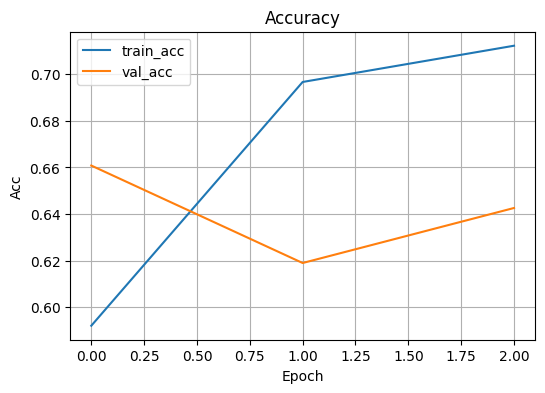

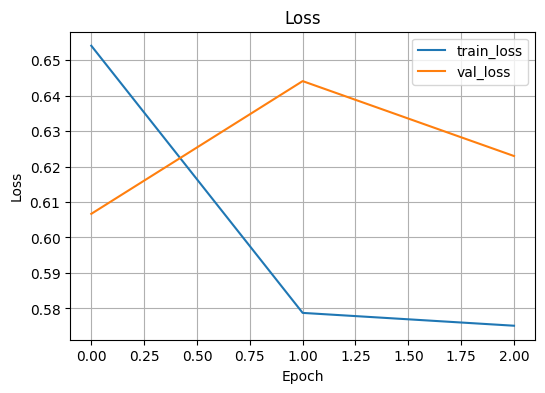

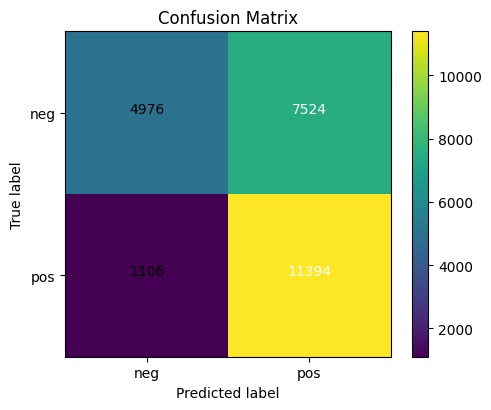

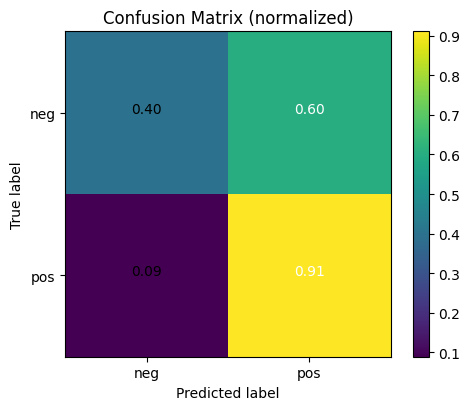

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

--- Review 0 | True: 0  Pred: 1 (p=0.535) ---

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PA

In [ ]:
# ==============================================================
# RNN (SimpleRNN) + IMDB Sentiment (benchmark)
# • Hiperparámetros en CONFIG • Curvas y métricas
# ==============================================================

# 0) IMPORTS
import os, random, itertools, math, time
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import confusion_matrix, classification_report

# ----------------------------
# 1) HIPERPARÁMETROS (EDITA AQUÍ)
# ----------------------------
CONFIG = {
    # Datos
    "dataset": "imdb",        # Benchmark IMDB (25k train / 25k test)
    "vocab_size": 20000,      # tamaño del vocabulario (palabras más frecuentes)
    "maxlen": 300,            # longitud máxima por reseña (padding/truncado)
    "use_subset": False,      # True para entrenar con un subconjunto si quieres acelerar
    "subset_train": 15000,    # si use_subset=True, cuántas muestras de train usar
    "subset_test": 10000,     # si use_subset=True, cuántas muestras de test usar

    # Entrenamiento
    "batch_size": 128,
    "epochs": 10,
    "validation_split": 0.2,
    "learning_rate": 1e-3,
    "early_stopping_patience": 2,

    # Modelo (SimpleRNN)
    "embedding_dim": 128,
    "rnn_units": 128,
    "bidirectional": False,   # si quieres BiRNN, pon True

    # Reproducibilidad
    "seed": 42,
}

# ----------------------------
# 2) SEMILLAS Y INFO
# ----------------------------
def set_seeds(seed=42):
    os.environ["PYTHONHASHSEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

set_seeds(CONFIG["seed"])
print(tf.__version__)

# ----------------------------
# 3) CARGA DE DATOS (IMDB)
# ----------------------------
vocab_size = CONFIG["vocab_size"]
maxlen = CONFIG["maxlen"]

# IMDB ya viene tokenizado como índices de palabras
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=vocab_size)

# Opcional: reducir tamaño para pruebas rápidas
if CONFIG["use_subset"]:
    x_train, y_train = x_train[:CONFIG["subset_train"]], y_train[:CONFIG["subset_train"]]
    x_test, y_test   = x_test[:CONFIG["subset_test"]],  y_test[:CONFIG["subset_test"]]

# Padding / truncado
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test  = keras.preprocessing.sequence.pad_sequences(x_test,  maxlen=maxlen)

print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")

# ----------------------------
# 4) MODELO: SimpleRNN
# ----------------------------
def build_rnn_model(config):
    inputs = keras.Input(shape=(config["maxlen"],), name="input_ids")
    x = layers.Embedding(config["vocab_size"], config["embedding_dim"], name="embedding")(inputs)
    if config["bidirectional"]:
        x = layers.Bidirectional(layers.SimpleRNN(config["rnn_units"]), name="birnn")(x)
    else:
        x = layers.SimpleRNN(config["rnn_units"], name="rnn")(x)
    outputs = layers.Dense(1, activation="sigmoid", name="logits")(x)
    model = keras.Model(inputs, outputs, name="SimpleRNN_IMDB")
    opt = keras.optimizers.Adam(learning_rate=config["learning_rate"])
    model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])
    return model

model = build_rnn_model(CONFIG)
model.summary()

# ----------------------------
# 5) ENTRENAMIENTO
# ----------------------------
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=CONFIG["early_stopping_patience"],
        restore_best_weights=True
    )
]

history = model.fit(
    x_train, y_train,
    batch_size=CONFIG["batch_size"],
    epochs=CONFIG["epochs"],
    validation_split=CONFIG["validation_split"],
    callbacks=callbacks,
    verbose=1
)

# ----------------------------
# 6) EVALUACIÓN
# ----------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

# Predicciones y umbral
y_prob = model.predict(x_test, batch_size=CONFIG["batch_size"], verbose=0).ravel()
y_pred = (y_prob >= 0.5).astype(int)

# Reporte de clasificación
print("\nClassification Report (test):")
print(classification_report(y_test, y_pred, target_names=["neg", "pos"], digits=4))

# ----------------------------
# 7) CURVAS DE ENTRENAMIENTO
# ----------------------------
def plot_history(h):
    # Accuracy
    plt.figure(figsize=(6,4))
    plt.plot(h["accuracy"], label="train_acc")
    plt.plot(h["val_accuracy"], label="val_acc")
    plt.title("Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Acc")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Loss
    plt.figure(figsize=(6,4))
    plt.plot(h["loss"], label="train_loss")
    plt.plot(h["val_loss"], label="val_loss")
    plt.title("Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_history(history.history)

# ----------------------------
# 8) MATRIZ DE CONFUSIÓN
# ----------------------------
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix'):
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1, keepdims=True)
    plt.figure(figsize=(5.2,4.2))
    plt.imshow(cm, interpolation='nearest')
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=["neg","pos"], normalize=False, title="Confusion Matrix")
plot_confusion_matrix(cm, classes=["neg","pos"], normalize=True,  title="Confusion Matrix (normalized)")

# ----------------------------
# 9) DECODIFICAR Algunas reseñas (opcional)
# ----------------------------
# Esto descarga el índice de palabras para traducir IDs -> palabras
word_index = keras.datasets.imdb.get_word_index()
index_word = { (idx+3): w for w, idx in word_index.items() }
index_word[0] = "<PAD>"
index_word[1] = "<START>"
index_word[2] = "<UNK>"
index_word[3] = "<UNUSED>"

def decode_review(seq_ids):
    return " ".join(index_word.get(i, "?") for i in seq_ids)

# Mostrar algunas predicciones con texto decodificado
for i in [0,1,2,3,4]:
    txt = decode_review(x_test[i])
    print("\n--- Review", i, "| True:", int(y_test[i]), " Pred:", int(y_pred[i]), f"(p={y_prob[i]:.3f}) ---\n")
    print(txt[:1000], "...")
